In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (18, 12)
plt.rcParams['font.size'] = 11

## 1. Triển khai các thuật toán

In [2]:
def f(x):
    return (x - 5)**2

def gradient(x):
    return 2 * (x - 5)

In [3]:
def adagrad(x0, eta, epsilon, num_iters):
    x = x0
    G = 0.0
    
    history = {
        't': [0], 'x': [x0], 'g': [gradient(x0)],
        'G': [0], 'lr_eff': [0], 'delta_x': [0]
    }
    
    for t in range(1, num_iters + 1):
        g = gradient(x)
        G += g**2
        lr_eff = eta / np.sqrt(G + epsilon)
        delta_x = -lr_eff * g
        x += delta_x
        
        history['t'].append(t)
        history['x'].append(x)
        history['g'].append(g)
        history['G'].append(G)
        history['lr_eff'].append(lr_eff)
        history['delta_x'].append(delta_x)
    
    return history

In [4]:
def rmsprop(x0, eta, rho, epsilon, num_iters):
    x = x0
    E_g2 = 0.0
    
    history = {
        't': [0], 'x': [x0], 'g': [gradient(x0)],
        'E_g2': [0], 'lr_eff': [0], 'delta_x': [0]
    }
    
    for t in range(1, num_iters + 1):
        g = gradient(x)
        E_g2 = rho * E_g2 + (1 - rho) * g**2
        lr_eff = eta / np.sqrt(E_g2 + epsilon)
        delta_x = -lr_eff * g
        x += delta_x
        
        history['t'].append(t)
        history['x'].append(x)
        history['g'].append(g)
        history['E_g2'].append(E_g2)
        history['lr_eff'].append(lr_eff)
        history['delta_x'].append(delta_x)
    
    return history

In [5]:
def adadelta(x0, rho, epsilon, num_iters):
    x = x0
    E_g2 = 0.0
    E_delta2 = 0.0
    
    history = {
        't': [0], 'x': [x0], 'g': [gradient(x0)],
        'E_g2': [0], 'E_delta2': [0], 'alpha': [0], 'delta_x': [0]
    }
    
    for t in range(1, num_iters + 1):
        g = gradient(x)
        E_g2 = rho * E_g2 + (1 - rho) * g**2
        alpha = np.sqrt(E_delta2 + epsilon) / np.sqrt(E_g2 + epsilon)
        delta_x = -alpha * g
        E_delta2 = rho * E_delta2 + (1 - rho) * delta_x**2
        x += delta_x
        
        history['t'].append(t)
        history['x'].append(x)
        history['g'].append(g)
        history['E_g2'].append(E_g2)
        history['E_delta2'].append(E_delta2)
        history['alpha'].append(alpha)
        history['delta_x'].append(delta_x)
    
    return history

## 2. Chạy thử nghiệm

In [6]:
x0 = 20.0
num_iters = 10

hist_adagrad = adagrad(x0, eta=1.0, epsilon=0, num_iters=num_iters)
hist_rmsprop = rmsprop(x0, eta=0.1, rho=0.9, epsilon=1e-6, num_iters=num_iters)
hist_adadelta = adadelta(x0, rho=0.9, epsilon=1e-6, num_iters=num_iters)

print("Kết quả sau 10 bước:")
print(f"Adagrad:  x₁₀ = {hist_adagrad['x'][10]:.4f}")
print(f"RMSProp:  x₁₀ = {hist_rmsprop['x'][10]:.4f}")
print(f"AdaDelta: x₁₀ = {hist_adadelta['x'][10]:.4f}")

Kết quả sau 10 bước:
Adagrad:  x₁₀ = 15.3349
RMSProp:  x₁₀ = 18.3019
AdaDelta: x₁₀ = 19.9663


## 3. Visualization

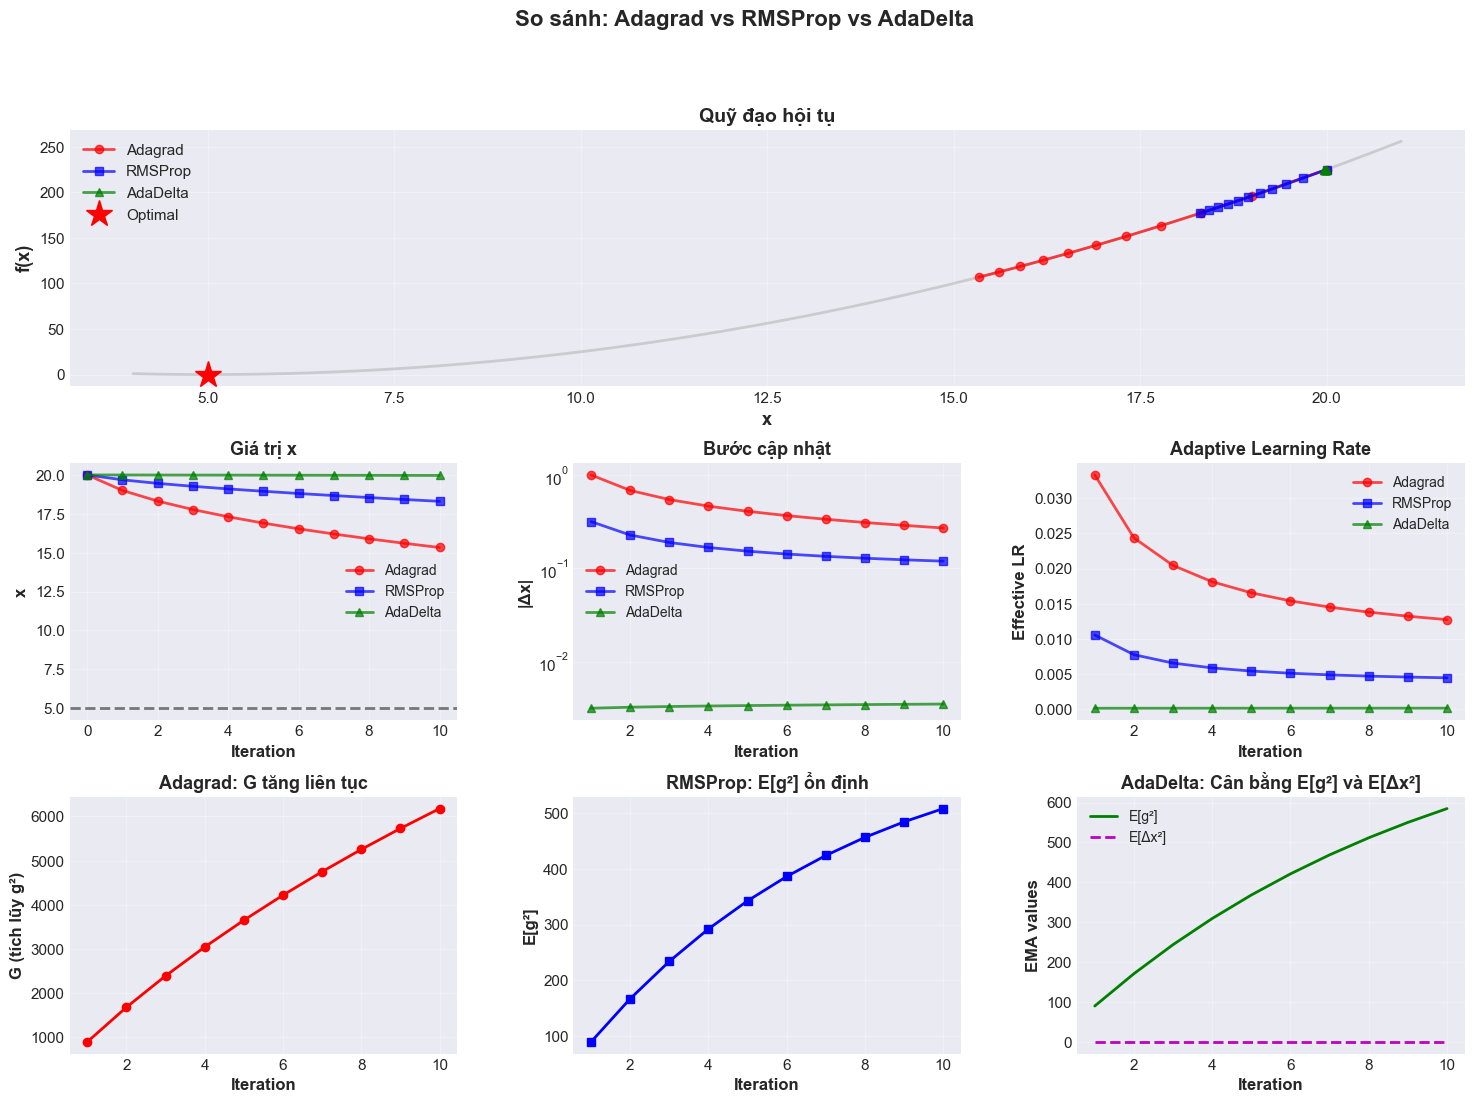

In [7]:
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Plot 1: Quỹ đạo
ax1 = fig.add_subplot(gs[0, :])
x_range = np.linspace(4, 21, 500)
y_range = f(x_range)
ax1.plot(x_range, y_range, 'gray', alpha=0.3, linewidth=2)

ax1.plot(hist_adagrad['x'], [f(x) for x in hist_adagrad['x']], 
         'ro-', markersize=6, linewidth=2, label='Adagrad', alpha=0.7)
ax1.plot(hist_rmsprop['x'], [f(x) for x in hist_rmsprop['x']], 
         'bs-', markersize=6, linewidth=2, label='RMSProp', alpha=0.7)
ax1.plot(hist_adadelta['x'], [f(x) for x in hist_adadelta['x']], 
         'g^-', markersize=6, linewidth=2, label='AdaDelta', alpha=0.7)

ax1.plot(5, 0, 'r*', markersize=20, label='Optimal')
ax1.set_xlabel('x', fontsize=13, fontweight='bold')
ax1.set_ylabel('f(x)', fontsize=13, fontweight='bold')
ax1.set_title('Quỹ đạo hội tụ', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Plot 2: x theo iteration
ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(hist_adagrad['t'], hist_adagrad['x'], 'ro-', markersize=6, linewidth=2, label='Adagrad', alpha=0.7)
ax2.plot(hist_rmsprop['t'], hist_rmsprop['x'], 'bs-', markersize=6, linewidth=2, label='RMSProp', alpha=0.7)
ax2.plot(hist_adadelta['t'], hist_adadelta['x'], 'g^-', markersize=6, linewidth=2, label='AdaDelta', alpha=0.7)
ax2.axhline(y=5, color='black', linestyle='--', linewidth=2, alpha=0.5)
ax2.set_xlabel('Iteration', fontsize=12, fontweight='bold')
ax2.set_ylabel('x', fontsize=12, fontweight='bold')
ax2.set_title('Giá trị x', fontsize=13, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

# Plot 3: Bước cập nhật
ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(hist_adagrad['t'][1:], [abs(d) for d in hist_adagrad['delta_x'][1:]], 
         'ro-', markersize=6, linewidth=2, label='Adagrad', alpha=0.7)
ax3.plot(hist_rmsprop['t'][1:], [abs(d) for d in hist_rmsprop['delta_x'][1:]], 
         'bs-', markersize=6, linewidth=2, label='RMSProp', alpha=0.7)
ax3.plot(hist_adadelta['t'][1:], [abs(d) for d in hist_adadelta['delta_x'][1:]], 
         'g^-', markersize=6, linewidth=2, label='AdaDelta', alpha=0.7)
ax3.set_xlabel('Iteration', fontsize=12, fontweight='bold')
ax3.set_ylabel('|Δx|', fontsize=12, fontweight='bold')
ax3.set_title('Bước cập nhật', fontsize=13, fontweight='bold')
ax3.set_yscale('log')
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3)

# Plot 4: Learning rate
ax4 = fig.add_subplot(gs[1, 2])
ax4.plot(hist_adagrad['t'][1:], hist_adagrad['lr_eff'][1:], 
         'ro-', markersize=6, linewidth=2, label='Adagrad', alpha=0.7)
ax4.plot(hist_rmsprop['t'][1:], hist_rmsprop['lr_eff'][1:], 
         'bs-', markersize=6, linewidth=2, label='RMSProp', alpha=0.7)
ax4.plot(hist_adadelta['t'][1:], hist_adadelta['alpha'][1:], 
         'g^-', markersize=6, linewidth=2, label='AdaDelta', alpha=0.7)
ax4.set_xlabel('Iteration', fontsize=12, fontweight='bold')
ax4.set_ylabel('Effective LR', fontsize=12, fontweight='bold')
ax4.set_title('Adaptive Learning Rate', fontsize=13, fontweight='bold')
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3)

# Plot 5-7: Chi tiết từng thuật toán
ax5 = fig.add_subplot(gs[2, 0])
ax5.plot(hist_adagrad['t'][1:], hist_adagrad['G'][1:], 'ro-', linewidth=2, markersize=6)
ax5.set_xlabel('Iteration', fontsize=12, fontweight='bold')
ax5.set_ylabel('G (tích lũy g²)', fontsize=12, fontweight='bold')
ax5.set_title('Adagrad: G tăng liên tục', fontsize=13, fontweight='bold')
ax5.grid(True, alpha=0.3)

ax6 = fig.add_subplot(gs[2, 1])
ax6.plot(hist_rmsprop['t'][1:], hist_rmsprop['E_g2'][1:], 'bs-', linewidth=2, markersize=6)
ax6.set_xlabel('Iteration', fontsize=12, fontweight='bold')
ax6.set_ylabel('E[g²]', fontsize=12, fontweight='bold')
ax6.set_title('RMSProp: E[g²] ổn định', fontsize=13, fontweight='bold')
ax6.grid(True, alpha=0.3)

ax7 = fig.add_subplot(gs[2, 2])
ax7.plot(hist_adadelta['t'][1:], hist_adadelta['E_g2'][1:], 'g-', linewidth=2, label='E[g²]')
ax7.plot(hist_adadelta['t'][1:], hist_adadelta['E_delta2'][1:], 'm--', linewidth=2, label='E[Δx²]')
ax7.set_xlabel('Iteration', fontsize=12, fontweight='bold')
ax7.set_ylabel('EMA values', fontsize=12, fontweight='bold')
ax7.set_title('AdaDelta: Cân bằng E[g²] và E[Δx²]', fontsize=13, fontweight='bold')
ax7.legend(fontsize=10)
ax7.grid(True, alpha=0.3)

plt.suptitle('So sánh: Adagrad vs RMSProp vs AdaDelta', fontsize=16, fontweight='bold')
plt.show()

## 4. Bảng so sánh

In [8]:
data = []
for t in range(11):
    data.append({
        'Step': t,
        'Adagrad x': f"{hist_adagrad['x'][t]:.4f}",
        'RMSProp x': f"{hist_rmsprop['x'][t]:.4f}",
        'AdaDelta x': f"{hist_adadelta['x'][t]:.4f}"
    })

df = pd.DataFrame(data)
print(df.to_string(index=False))

print("\n" + "="*80)
print("KẾT LUẬN:")
print("="*80)
print("\n✅ Adagrad: LR giảm quá nhanh → tiến chậm")
print("✅ RMSProp: EMA giữ LR ổn định → tiến tốt hơn")
print("✅ AdaDelta: Tự điều chỉnh, ổn định nhất")

 Step Adagrad x RMSProp x AdaDelta x
    0   20.0000   20.0000    20.0000
    1   19.0000   19.6838    19.9968
    2   18.3177   19.4567    19.9936
    3   17.7732   19.2677    19.9903
    4   17.3104   19.1008    19.9870
    5   16.9030   18.9484    19.9836
    6   16.5365   18.8064    19.9802
    7   16.2017   18.6722    19.9767
    8   15.8926   18.5442    19.9733
    9   15.6048   18.4210    19.9698
   10   15.3349   18.3019    19.9663

KẾT LUẬN:

✅ Adagrad: LR giảm quá nhanh → tiến chậm
✅ RMSProp: EMA giữ LR ổn định → tiến tốt hơn
✅ AdaDelta: Tự điều chỉnh, ổn định nhất
